# SALES ANALYSIS

### Through this project, we aim to analyse the strength and weakness of a company operating internationally
Points considered here :
 - No Profit data available.
 - The Company operates in 3 international territories:
    - EMEA
    - APAC
    - North America
 - Data available from 2003 till mid of 2005. (10 quarters inclusive)
 - The company does not operate in a retail segment since it sells the products in order quantity of more than 10.
 - We have 92 distinct customers across 19 countries and 3 territories.
 
### Conclusions
- The seasonality of sales across all Product lines could be explained by the rise in demand for vehicles/vehicle parts during the summer and winter months.
- The Highest revenue comes from EMEA followed by North America and APAC respectivevly.
- The top 5 cities come from the top 5 countries (by order) except in case of Singapore.
- The sale and the quantitites ordered is same for 4 out of the bottom 5 cities; while Brisbane is among the bottom 5 in sales, but Dublin is in bottom 5 by quantitires ordered.
- The Maximum sales overall is accounted for Medium Dealsize, comparatively the sales is less for Small Dealsize and least for the Large Dealsize.
- Classic Cars, Vintage cars and Motorcycles account for the major sales across all the 3 dealsizes.
- Among the orders that were not shipped, the majority were cancelled.
- One point to note, among the most cancelled orders, the majority belonged to the order of Ships. This is a point to note because the sales from Ships only contributed 8% of our total sales.
- USA has the highest orders across all our Productlines. In EMEA, we have Spain and France to have the majority of orders.
- Across the productlines, we are selling mostly below the MSRP except for Trains (where Price and MSRP are equal), classic Cars and Vintage Cars (where Price > MSRP)
- We notice that the Sales increases as the Price of each item increases with a correlation of 0.7. That is a Positive point.
- From Correlation Matrix, we can say that Dealsize has a negative impact on Sales.
- There is also a high Correlation between Sales and Price of Each Item; MSRP and Price (we are trying to sell close to MSRP).
- From the RFM matrix, we can conclude that 16% of our customers are loyal and they come back to us. Thus we should try to retain them.
- The customers who are 'at risk' account for 16% of the customerbase, so personalized reactivation campaigns could be made to focus towards them.
- For the 'champions' segment of the customers, more emphasis should be given for the new products as they could be potential early adopters.

<style>
div.warn {    
    color: #356A89;
    background-color: #FDFBEF;
    border-left: 5px solid #3C82E3;
    padding: 0.5em;
    }
 </style>
<div class = warn><h3><b><font color = 'indigo'> Importing Libraries and Reading the Data

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np

#libraries to visualize the data
import matplotlib.pyplot as plt 
import matplotlib as mpl
import matplotlib.colors as mcolors
import seaborn as sns
import plotly


In [2]:
 #reading the data from the csv file and storing in a dataframe called sales
sales_og = pd.read_csv(r'sales_data.csv')


In [3]:
#checking the first 5 rows of the dataframe 
sales_og.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [4]:
#checking the shape of the dataframe
sales_og.shape

(2823, 25)

<style>
div.warn {    
    color: #356A89;
    background-color: #FDFBEF;
    border-left: 5px solid #3C82E3;
    padding: 0.5em;
    }
 </style>
<div class = warn><h3><b><font color = 'indigo'> Descriptive analysis of the Data

In [5]:
#checking the basic innformation of the dataframe
sales_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [6]:
#Functions for label and Plot styles
def plot_Style():
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
def label_Style(x,y):
    ax.set_xlabel(x, fontsize=16)
    ax.set_ylabel(y, fontsize=16)
def label_Size(x,y):
    plt.xlabel(x, fontsize=16)
    plt.ylabel(y, fontsize=16)
def label_Style1(x,y):
  ax1.set_xlabel(x, fontsize = 16)
  ax1.set_ylabel(y, fontsize = 16)
def plot_Style1():
  ax1.spines['top'].set_visible(False)
  ax1.spines['right'].set_visible(True)
  ax1.spines['bottom'].set_visible(True)
  ax1.spines['left'].set_visible(True)
def plot_Style2():
  ax2.spines['top'].set_visible(False)
  ax2.spines['right'].set_visible(True)
  ax2.spines['bottom'].set_visible(True)
  ax2.spines['left'].set_visible(True)


In [7]:
#basic descriptive information for the data
round(sales_og.describe(),2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.00,2823.00,2823.00,2823.00,2823.00,2823.00,2823.00,2823.00,2823.00
mean,10258.73,35.09,83.66,6.47,3553.89,2.72,7.09,2003.82,100.72
std,92.09,9.74,20.17,4.23,1841.87,1.20,3.66,0.70,40.19
min,10100.00,6.00,26.88,1.00,482.13,1.00,1.00,2003.00,33.00
25%,10180.00,27.00,68.86,3.00,2203.43,2.00,4.00,2003.00,68.00
50%,10262.00,35.00,95.70,6.00,3184.80,3.00,8.00,2004.00,99.00
75%,10333.50,43.00,100.00,9.00,4508.00,4.00,11.00,2004.00,124.00
max,10425.00,97.00,100.00,18.00,14082.80,4.00,12.00,2005.00,214.00


<style>
table, th, td {
  border-style: none;
}
div.warn {    
    color: #356A89;
    background-color: #FDFBEF;
    }
 </style>
<div class = 'warn'>
<table>
    <tr>
        <td><font color = 'red'>Max quantity ordered is 97</td>
        <td><font color = 'navy'>Max price is 100</td>
        <td><font color = 'green'>Max MSRP = 214</td>
    </tr>
    <tr>
    <td><font color = 'red'>Min qunantity ordered is 6</td>
    <td><font color = 'navy'>Min Price is 27</td>
    <td><font color = 'green'>Min MSRP = 33</td>
    </tr>
    <tr>
        <td><font color = 'red'>Avg quantity ordred is 35</td>
        <td><font color = 'navy'>Avg price is 84</td>
        <td><font color = 'green'>Avg MSRP = 101</td>
    </tr>
    </div>

In [8]:
#checking the total number of duplicate records in the dataframe
sales_og.duplicated().sum()

0

<style>
div.warn {    
    color: #356A89;
    background-color: #FDFBEF;
    border-left: 5px solid #3C82E3;
    padding: 0.5em;
    }
 </style>
<div class = warn>
<h4><b> <font color = 'indigo'>So, we can infer from the dataset that</b>
<ul>
<li> we do not have any duplicated record. 
<li> we combine the address lines into one single column 
<li> convert the null values to blank strings for concatenating the 2 columns
<br>
<br>

In [9]:
#Filling nan values with blank string
sales_og.ADDRESSLINE2.fillna('', inplace= True)

#Combining both the address lines into 1 address
sales_og['Address'] = sales_og['ADDRESSLINE1'] + sales_og['ADDRESSLINE2']

#Dropping columns AddressLine1 and AddressLine2
sales_og.drop(['ADDRESSLINE1', 'ADDRESSLINE2'], axis =1, inplace = True)

<h3><b><font color = 'indigo'> Dividing the dataframe into 2

<style>
div.warn {    
    color: #356A89;
    background-color: #FDFBEF;
    border-left: 5px solid #3C82E3;
    padding: 0.5em;
    }
 </style>
<div class = warn>
<h4><font color = 'indigo'>Now for ease of analysing the data, we divide our sales dataset into two other subset datasets:

*   Order details
*   Customer details

In [10]:
#getting the order dataframe
order_temp = sales_og.iloc[:,0:12]
temp = sales_og.iloc[:,-2:-1] #temporary dataframe to store the dealsize column
order = pd.concat([order_temp, temp], axis = 1, join = 'inner') #merging the 2 temporary dataframes to get the order dataframe

In [11]:
#getting the customer dataframe
customer = sales_og.iloc[:,13:]
customer.drop('DEALSIZE', axis = 1, inplace = True)

In [12]:
#changing the column names in both the subset dataframes to lower case
order = order.rename(columns= str.lower)
customer = customer.rename(columns = str.lower)

<style>
div.warn {    
    color: #356A89;
    background-color: #FDFBEF;
    border-left: 5px solid #3C82E3;
    padding: 0.5em;
    }
 </style>
<div class = warn>
<h3><b><font color = 'indigo'> Cleaning the data

<h5><font color = 'red'>Percentage of missing values in each column

In [13]:
#looking at the percentage of missing values per column in order dataset
for col in order.columns:
    per_missing = round((np.mean(order[col].isnull()))*100,2)
    print('{}.{}%'.format(col, per_missing))

ordernumber.0.0%
quantityordered.0.0%
priceeach.0.0%
orderlinenumber.0.0%
sales.0.0%
orderdate.0.0%
status.0.0%
qtr_id.0.0%
month_id.0.0%
year_id.0.0%
productline.0.0%
msrp.0.0%
dealsize.0.0%


In [14]:
#looking for percentage of missing values in customer dataset
for col in customer.columns:
    per_missing = round((np.mean(customer[col].isnull()))*100,2)
    print('{}.{}%'.format(col, per_missing))

customername.0.0%
phone.0.0%
city.0.0%
state.52.64%
postalcode.2.69%
country.0.0%
territory.38.04%
contactlastname.0.0%
contactfirstname.0.0%
address.0.0%


#### We can see that the columns STATE, POSTALCODE, territory have the missing values. 
#### Now we should check how many records are missing in each of the columns and investigate why.
#### We can infer that none of the columns in the order dataframe have missing or null values

In [15]:
#checking sum of null values in each column
print("state null values : "+ str(customer.state.isnull().sum()))
print("postalcode null values : "+str(customer.postalcode.isnull().sum()))
print("territory null values : "+str(customer.territory.isnull().sum()))

state null values : 1486
postalcode null values : 76
territory null values : 1074


<style>
div.warn {    
    color: #356A89;
    background-color: #FDFBEF;
    border-left: 5px solid #3C82E3;
    padding: 0.5em;
    }
 </style>
<div class = warn>
<h3><b><font color = 'indigo'>Heatmap to show the percentage of missing values in customer dataframe

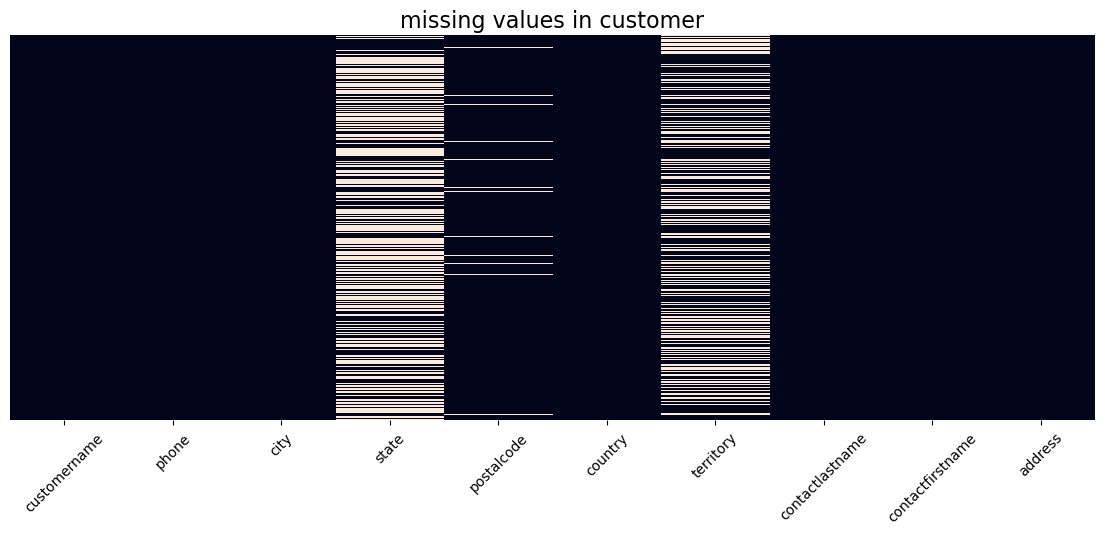

In [16]:
plt.figure(figsize= (14,5))
sns.heatmap(customer.isnull(), yticklabels = False, cbar= False)
plt.title('missing values in customer', fontsize = 16)
plt.xticks(rotation = 45)
plt.show()

In [17]:
#getting the unique values for the territory, state and country column
print(customer.territory.unique())
print(customer.state.unique())
print(customer.country.unique())

[nan 'EMEA' 'APAC' 'Japan']
['NY' nan 'CA' 'Victoria' 'NJ' 'CT' 'MA' 'PA' 'NSW' 'Queensland' 'BC'
 'Tokyo' 'NH' 'Quebec' 'Osaka' 'Isle of Wight' 'NV']
['USA' 'France' 'Norway' 'Australia' 'Finland' 'Austria' 'UK' 'Spain'
 'Sweden' 'Singapore' 'Canada' 'Japan' 'Italy' 'Denmark' 'Belgium'
 'Philippines' 'Germany' 'Switzerland' 'Ireland']


<style>
div.warn {    
    color: #356A89;
    background-color: #FDFBEF;
    border-left: 5px solid #3C82E3;
    padding: 0.5em;
    }
 </style>
<div class = warn>
<h3><b><font color = 'navy'>We can see from the unique values of the state and country data, that the state data is missing for the European countries and Phillipines

In [18]:
#changing the territory according to the country
#function to change the territory
def change_territory(country_name):
    for i in range(len(customer.country)):
        if customer.country[i] in ['USA','Canada']:
            customer.territory[i] = 'North America'
        elif customer.country[i] in ['Singapore','Philippines','Japan']:
            customer.territory[i] = 'APAC'

In [19]:
change_territory('USA')
change_territory('Canada')
change_territory('Singapore')
change_territory('Japan')
change_territory('Philippines')

In [20]:
customer.territory.isnull().sum()

0

In [21]:
customer.territory.unique()

array(['North America', 'EMEA', 'APAC'], dtype=object)

<style>
div.warn {    
    color: #356A89;
    background-color: #FDFBEF;
    border-left: 5px solid #3C82E3;
    padding: 0.5em;
    }
 </style>
<div class = warn>
<h4><font color = 'navy'><b>We need to populate the state and the postal codes for the countries. However, since we are diving into a broader analysis of the Sales team for international Sales, we do not aim to use the postalcodes and the state records for our analysis. Thus we can drop the columns.

In [22]:
customer.drop(['state', 'postalcode'], axis =1, inplace = True)

<h3><b><font color = 'red'> Data Preprocessing

In [23]:
#appending the country column to the order dataset
order['country'] = customer['country']
#adding the city column to the order dataset
order['city'] = customer.city

In [24]:
#we are creating 2 separate columns to store the order dates and the corresponding weekday.
import calendar
order['date'] = pd.to_datetime(order.orderdate)
order['day'] = order.date.dt.day_name()
order.head(2)
order['dealsize'] = sales_og.DEALSIZE
order.head()


,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,productline,msrp,dealsize,country,city,date,day
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,Small,USA,NYC,2003-02-24,Monday
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,Small,France,Reims,2003-05-07,Wednesday
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,Medium,France,Paris,2003-07-01,Tuesday
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,Medium,USA,Pasadena,2003-08-25,Monday
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,Medium,USA,San Francisco,2003-10-10,Friday


<h1><b><font color = 'red'>EDA

<style>
div.warn {    
    color: #356A89;
    background-color: #FDFBEF;
    border-left: 5px solid #3C82E3;
    padding: 0.5em;
    }
 </style>
<div class = warn>
<h3><b><font color = 'navy'> TREND ANALYSIS

<h3><b><font color='red'>1. How sales Behaviour changed over the years?


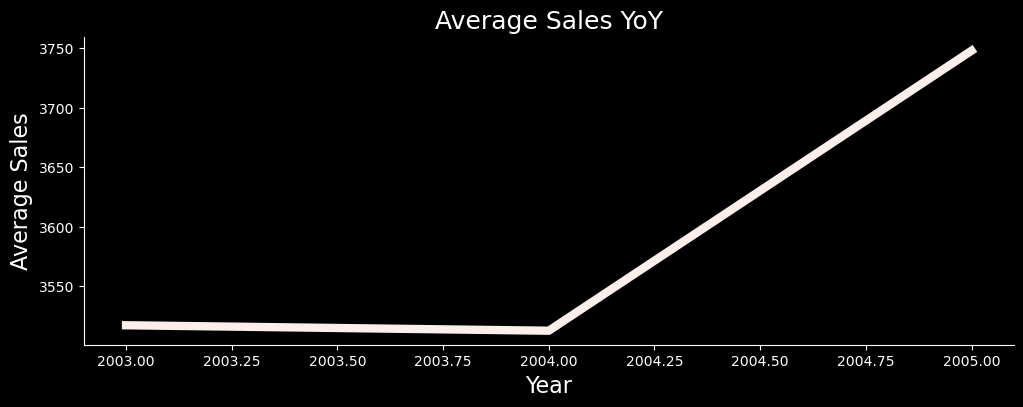

In [25]:

#grouping the sales average by year
gp_year_avg = order.groupby(['year_id'], as_index = False)['sales'].mean()
year = gp_year_avg.year_id.unique()

#plotting the sales average by year
with plt.style.context('dark_background'):
    fig, ax = plt.subplots(figsize=(12, 4))
    plt.plot(year,gp_year_avg.sales, color = '#FCEEEB',linestyle= 'solid', linewidth= 6)
    label_Size('Year','Average Sales')
    plot_Style()
    plt.grid(False)
    plt.title("Average Sales YoY", fontdict={'fontsize': 18})
plt.show()

<h3><b><font color='red'>2. How Average Sales changed by Quarter?


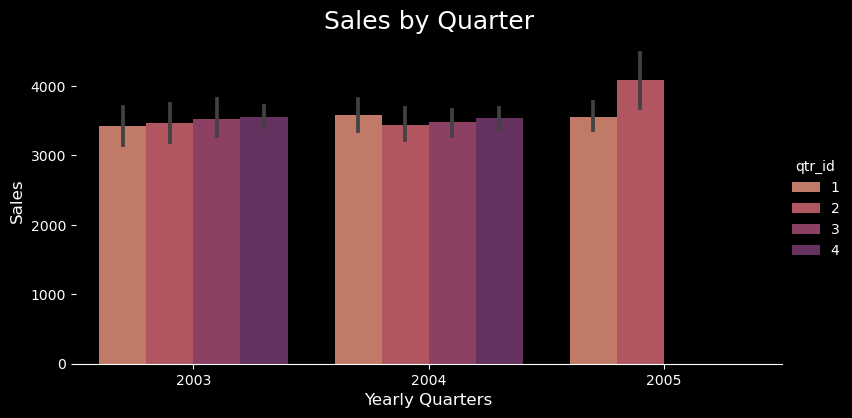

In [26]:
#plotting average sales according to quarter
from statistics import mean
with plt.style.context('dark_background'):
  # Drawing a nested barplot 
  g = sns.catplot(
      data=order, kind="bar",
      x="year_id", y="sales", hue="qtr_id", estimator= mean,
      palette="flare", alpha=0.9, height=4, aspect=2)
  g.despine(left=True)
  g.set_axis_labels("Yearly Quarters", "Sales", fontsize = 12)
  plt.title("Sales by Quarter", fontsize = 18)
  plt.show()



<h3><font color = 'red'><b>3. How the Sales of each Product category change YoY?

We  can infer over the years, the general sales figure increased . We now need to know, which category contributed for the most sales

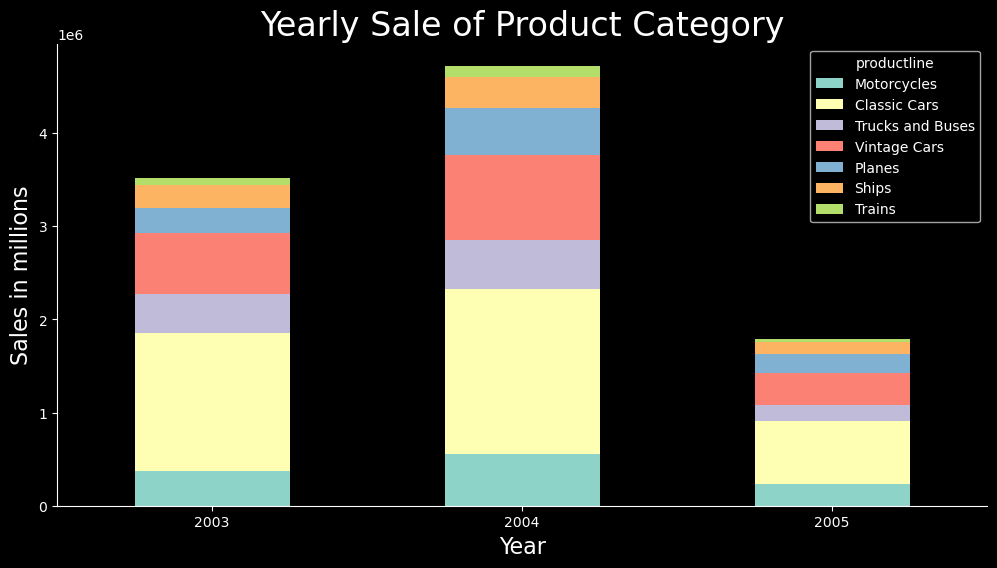

In [27]:
product_year = order.groupby(['year_id','productline']).sum().reset_index()

#creating a pivot table
pivot_table_prod_yr = pd.pivot_table(product_year,values= 'sales', index = ['year_id'], columns= ['productline'], aggfunc= np.sum).reset_index()
list = ['red','blue', 'yellow','pink','cyan','orange','green']
#plotting the result
product_category = order.productline.unique()
with plt.style.context('dark_background'):
  ax = pivot_table_prod_yr.plot.bar(x = 'year_id', y = product_category, stacked = True,figsize=(12, 6))
  label_Size('Year','Sales in millions')
  plt.grid(False)
  plot_Style()
  plt.xticks(rotation = 0)
  plt.grid(False)
  plt.title("Yearly Sale of Product Category", fontdict={'fontsize': 24})
plt.show()


<h3><font color = 'red'><b>4. Which month sells the most product?

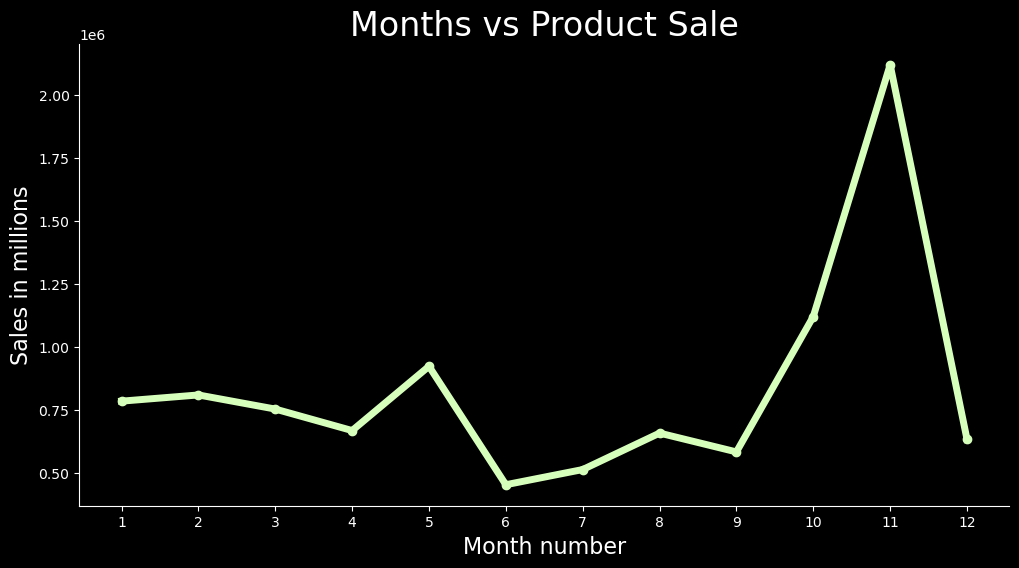

In [28]:
result2 = order.groupby('month_id').sum()
#plotting the result
months = range(1,13)

with plt.style.context('dark_background'):
  fig, ax = plt.subplots(figsize=(12,6))
  plt.plot(months, result2['sales'], color = '#D7FFBC', marker = "o", linewidth = 5 )
  plt.title('Months vs Product Sale', fontsize = 24)
  plt.xticks(months)
  label_Style('Month number','Sales in millions')
  plot_Style()
plt.show()


<h3><font color = 'red'><b>5. Heat map illustrating the Sales in each country

In [29]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

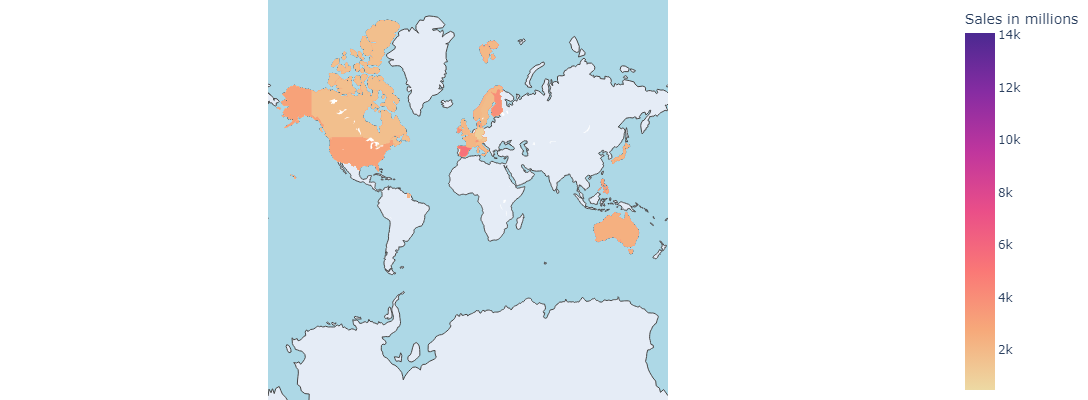

In [30]:
#creating Choropleth plot of the sales for countries 
data = dict(
        type = 'choropleth',
        colorscale = 'agsunset',
        reversescale = True,
        locations = customer.country,
        locationmode = "country names",
        z= order['sales'],
        colorbar = {'title': 'Sales in millions'}
        )
layout = dict(title = 'Total sales in millions',
                geo = dict(showframe = False,projection = {'type':'mercator'})
             )

choromap = go.Figure(data = [data],layout = layout)

fig = choromap.update_layout( width = 700, height = 400)
hexcode = 0
borders=[hexcode for x in range(len(data))]
fig.update_traces(marker_line_width=borders)
fig.update_geos(showocean = True, oceancolor = "lightblue")

fig1 = fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
iplot(fig1 ,validate=False)


<h3><font color = 'red'><b>6. Which day sells the most product?

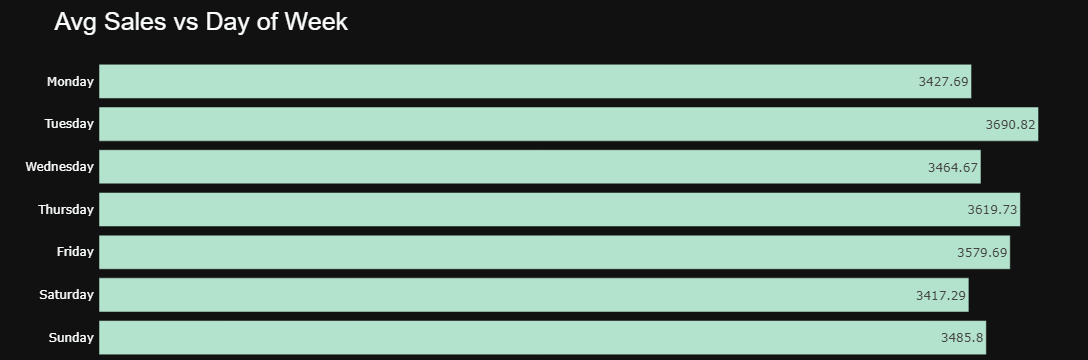

In [31]:
#data
df_dw_sa = order.groupby('day').agg({"sales":"mean"}).reset_index()
df_dw_sa.sales = round(df_dw_sa.sales,2)

#chart
fig = px.bar(df_dw_sa, y='day', x='sales', title='Avg Sales vs Day of Week',
              text='sales', color_discrete_sequence=px.colors.qualitative.Pastel2,
             category_orders=dict(day=["Monday","Tuesday","Wednesday","Thursday", "Friday","Saturday","Sunday"]))
fig.update_yaxes(showgrid=False, ticksuffix=' ', showline=False)
fig.update_xaxes(visible=False)
fig.update_layout(margin=dict(t=60, b=1, l=0, r=0), height=250,
                  hovermode="y unified",
                  yaxis_title=" ", template='plotly_dark',
                  title_font=dict(size=25, color='#FCFEFE', family="Lato, sans-serif"),
                  font=dict(color='#FCFEFE'),
                  hoverlabel=dict(bgcolor="#c6ccd8", font_size=13, font_family="Lato, sans-serif"))

<h3><font  color = 'red'><b>7. What is the Sales Trends across years for all Products?

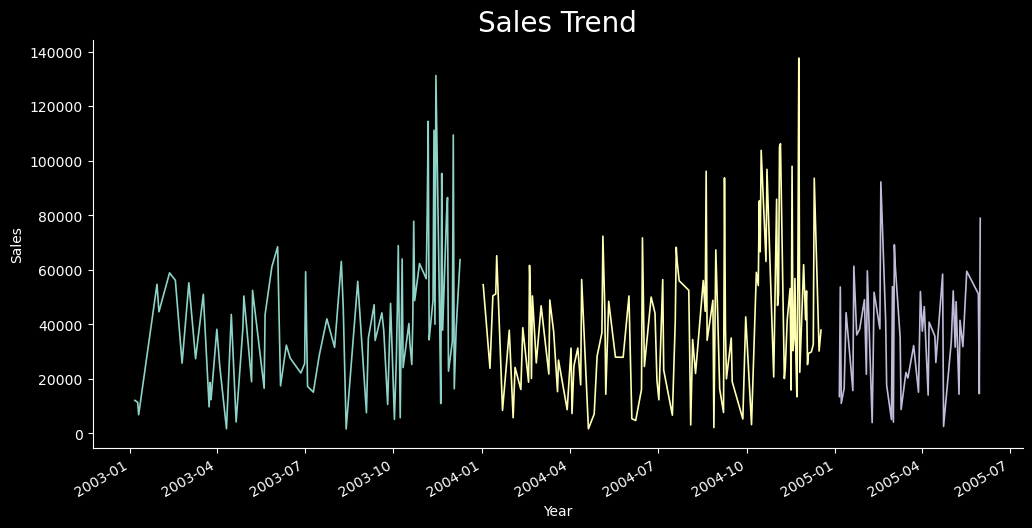

In [32]:
years = [unique for unique in order.year_id.unique()]
years
def plot_trend(years:list, order):
    for year in years:
        new_df = order[order['year_id'] == year]
        new_df.groupby('date')['sales'].sum().plot(linewidth=1.2, 
                                             ylabel='Sales', 
                                             xlabel='Year', 
                                             title='Sales Trend');
#plotting
import matplotlib.patches as patches
from sqlalchemy import false
with plt.style.context('dark_background'):
  fig, ax = plt.subplots(figsize= (12,6))
  year1 = patches.Patch(color='#F9F98B', label='2003', linewidth = 8)
  year2 = patches.Patch(color='#FED6C8', label='2004',linewidth = 8)
  year3 = patches.Patch(color='#C9F6F9', label='2005',linewidth = 8)
  plot_Style()
  plot_trend(years, order)
  plt.title("Sales Trend", fontsize = 20)
plt.show()


<h3><font color = 'red'><b>8. How each product sale changes over months for all the territories?

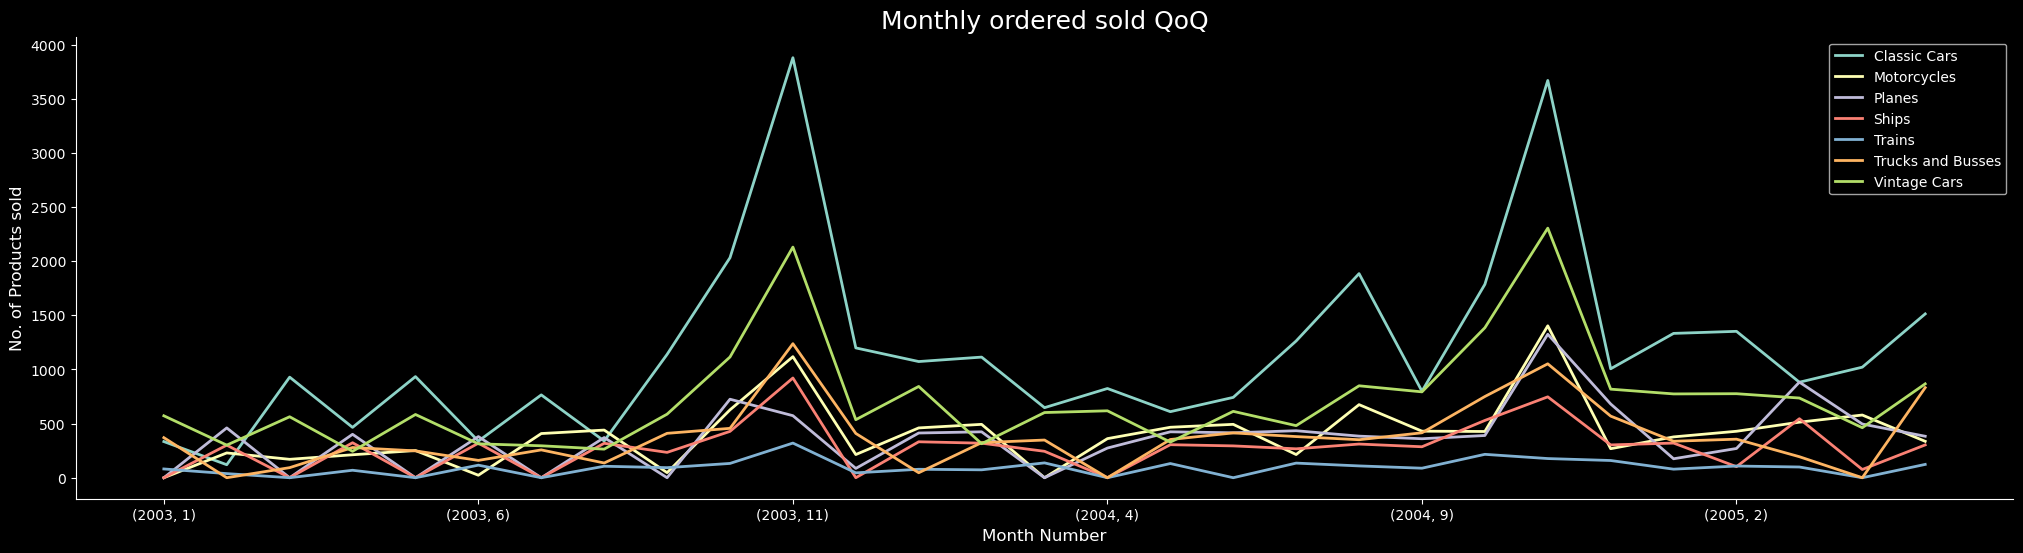

In [33]:
orderd = order.groupby(['year_id','month_id','productline']).quantityordered.sum()
ordered = orderd.unstack(level = 2).fillna(0)
with plt.style.context('dark_background'):
  ax= ordered.plot.line( figsize = (25,6), linewidth = 2);
  plt.legend(['Classic Cars','Motorcycles','Planes','Ships','Trains','Trucks and Busses','Vintage Cars'])
  plot_Style()
  plt.xlabel('Month Number', fontdict = {'fontsize': 12})
  plt.ylabel('No. of Products sold',fontdict = {'fontsize': 12})
  plt.title('Monthly ordered sold QoQ', fontsize = 18)
plt.show()

<h2><b><font  color = 'navy'>Sales Analysis

<b><h3><font color = 'red'>9. What are the Total Sales across Different Region?

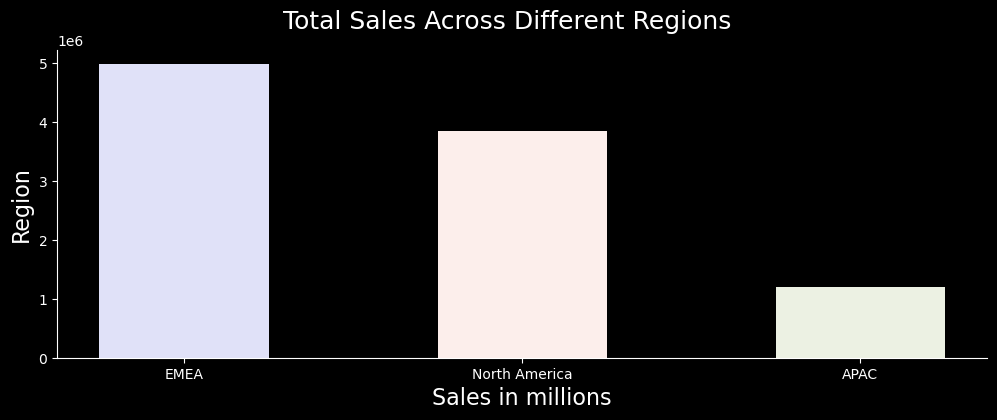

In [34]:
#appending the territory column to the order dataset
order['territory'] = customer['territory']
# First of all, we are going to take only the subset of data for our purpose.
df_bar = order[['territory','sales']]
with plt.style.context('dark_background'):
  # Grouping the DataFrame based on Regions and taking mean of profit across each of them.
  df_bar = df_bar.groupby(order.territory).sum().sort_values(by='sales', ascending=False)
  fig, ax = plt.subplots(figsize=(12, 4)) # Setting the figure size
  # Visualizing using Bar Chart
  plt.suptitle("Total Sales Across Different Regions", size=18)
  # Plotting the BarChart
  plt.bar(x=df_bar.index, height='sales', color=['#E0E1F8','#FCEEEB','#ECF1E3'], data=df_bar, width = 0.5)
  ax.set_xlabel('Sales in millions', fontsize=16)
  ax.set_ylabel('Region', fontsize=16)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(True)
  ax.spines['left'].set_visible(True)
  plt.grid(False)
plt.show()



<h3><font color = 'red'> <b>10. How many orders for each country?

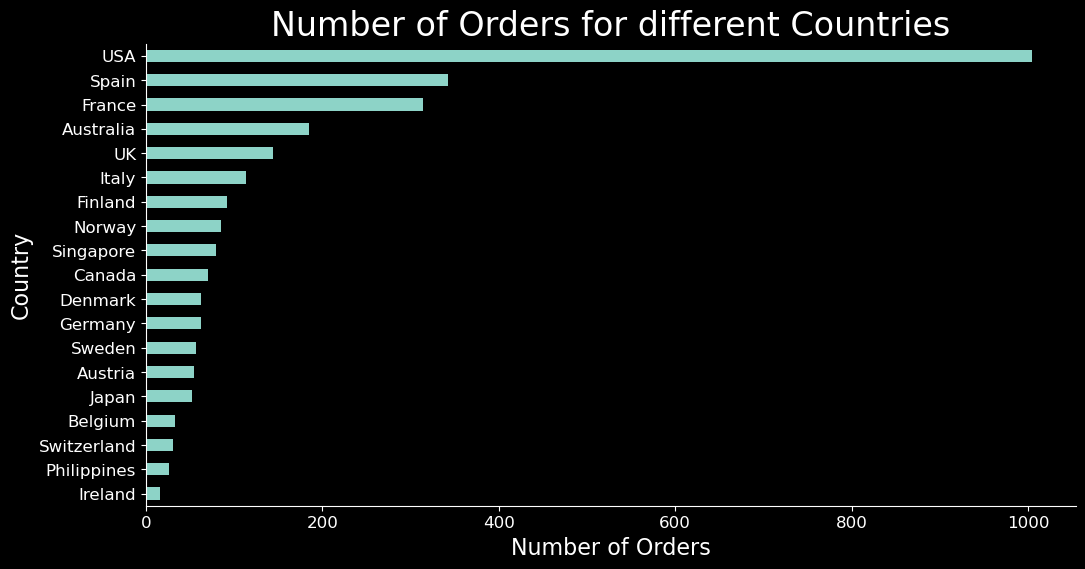

In [35]:
group_country_orders = order.groupby('country')['ordernumber'].count().sort_values()
with plt.style.context('dark_background'):
  fig, ax = plt.subplots(figsize=(12,6))
  ax = group_country_orders.plot(kind = 'barh', fontsize=12)
  label_Size('Number of Orders','Country')
  plt.grid(False)
  plot_Style()
  plt.title('Number of Orders for different Countries', fontsize=24)
  plt.show()



<h3><b><font color = 'red'>10a. What are the top 5 and bottom 5 Cities by Sales?


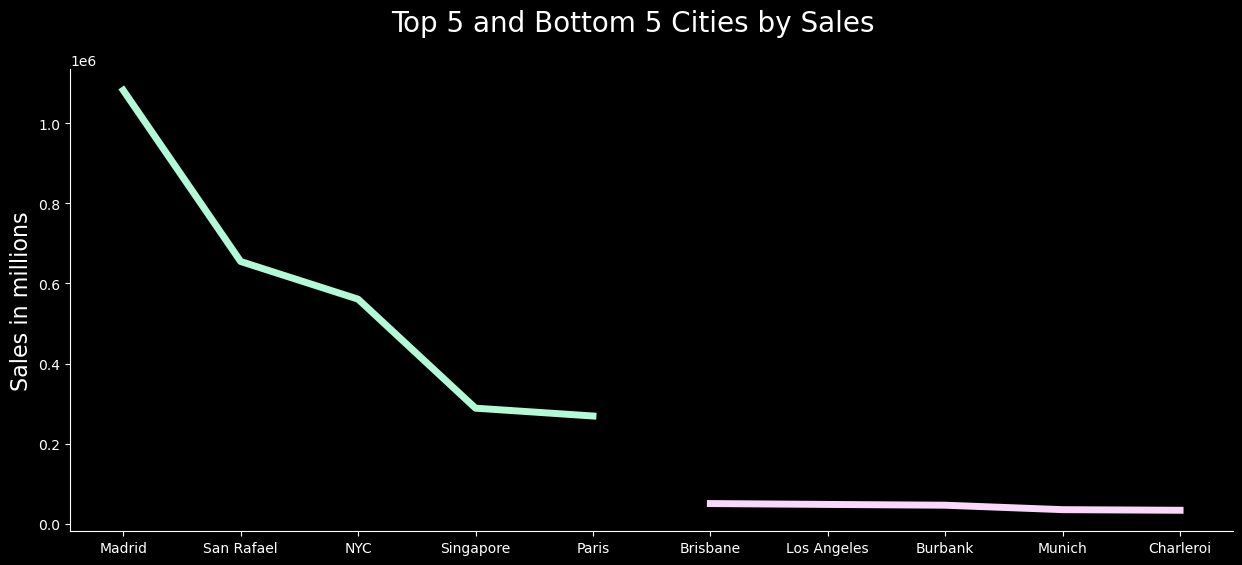

In [36]:
df = order.groupby(['city']).agg({'sales':np.sum})
df.reset_index()
df = df.sort_values(by = 'sales', ascending = False)
df2= df.tail(5)
df1 = df.head(5)
with plt.style.context('dark_background'):
  fig, ax = plt.subplots(figsize=(15,6))
  plt.plot(df1.index, df1.sales, color = '#B2FAD7', linewidth = 5)
  plt.plot(df2.index, df2.sales, color = '#F9D8FB', linewidth = 5)
  ax.set_ylabel('Sales in millions', fontsize=16)
  plot_Style()
  plt.suptitle('Top 5 and Bottom 5 Cities by Sales', fontsize = 20)
plt.show()

<h3><b><font color = 'red'>10b. Top 5 and Bottom 5 cities by Quantities ordered

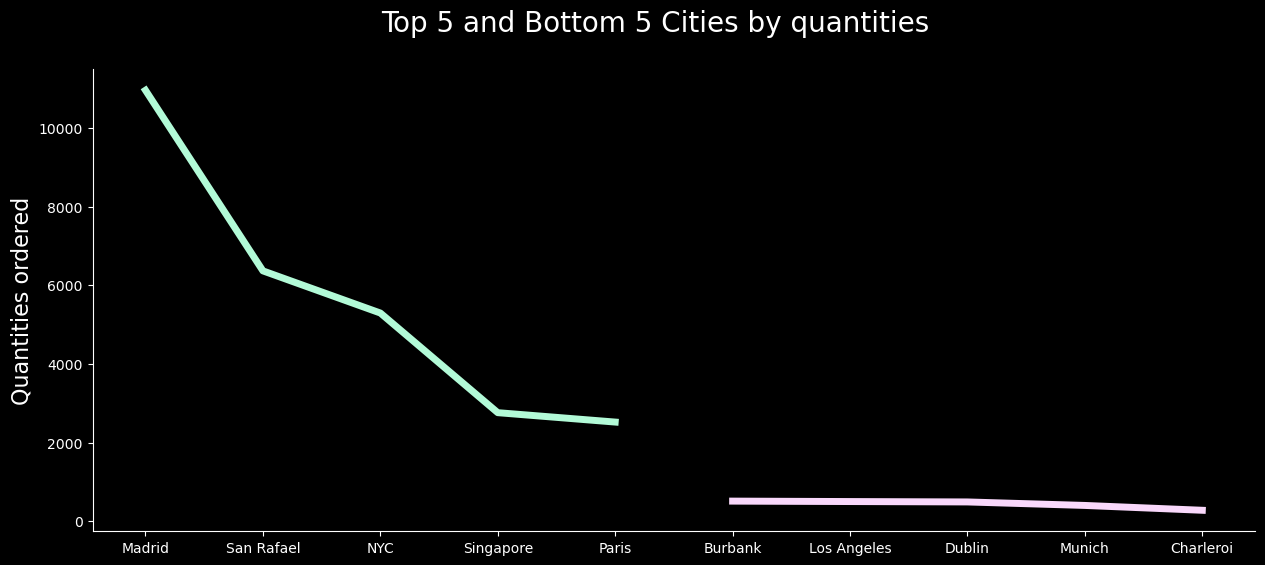

In [37]:
df = order.groupby(['city']).agg({'quantityordered':np.sum})
df.reset_index()
df = df.sort_values(by = 'quantityordered', ascending = False)
df2= df.tail(5)
df1 = df.head(5)
with plt.style.context('dark_background'):
  fig, ax = plt.subplots(figsize=(15,6))
  plt.plot(df1.index, df1.quantityordered, color = '#B2FAD7', linewidth = 5)
  plt.plot(df2.index, df2.quantityordered, color = '#F9D8FB', linewidth = 5)
  ax.set_ylabel('Quantities ordered', fontsize=16)
  plot_Style()
  plt.suptitle('Top 5 and Bottom 5 Cities by quantities', fontsize = 20)
plt.show()

<b><h3><font color = 'red'>11. How does the Total Sales look across each Product Category?


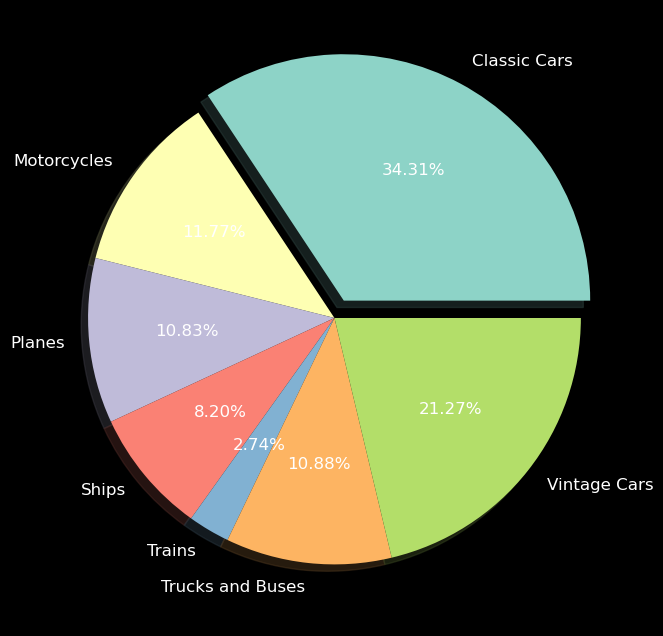

In [38]:

pie_data = order.groupby(['productline'], as_index= False)['quantityordered'].sum() #grouping the sum of sales across each product line
with plt.style.context('dark_background'):
  explode = [0.08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  plt.figure(figsize=(12,8))
  plt.pie(pie_data.quantityordered,labels = pie_data.productline, explode = explode ,shadow = True,  autopct='%.2f%%', textprops={'fontsize': 12})
plt.show()

<b><h3><font color = 'red'>12. How the Sale of Products vary according to Dealsize?

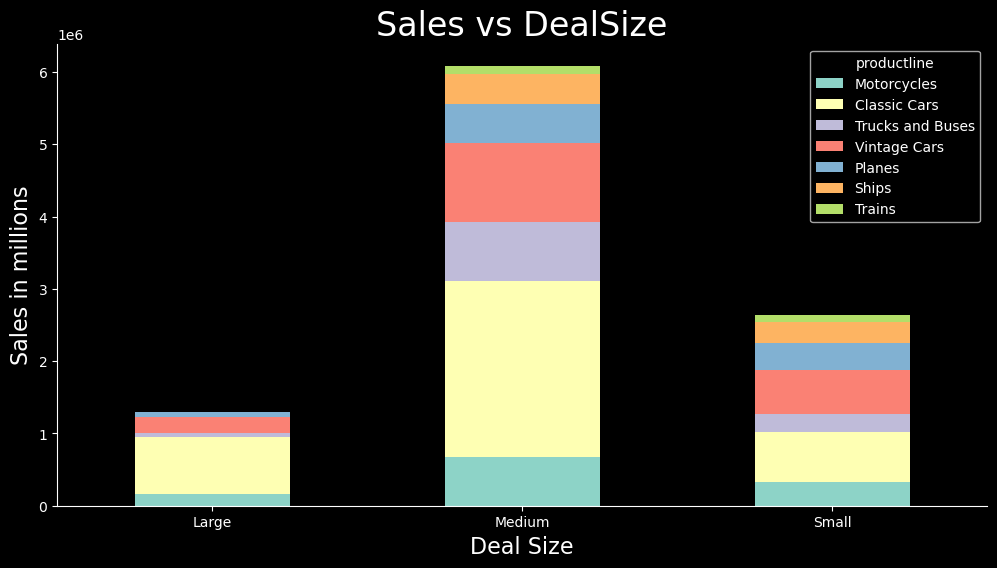

In [39]:
product_dealsize = order.groupby(['dealsize','productline']).sum().reset_index()
#creating a pivot table
pivot_table_prod_deal = pd.pivot_table(product_dealsize,values= 'sales', index = ['dealsize'], columns= ['productline'], aggfunc= np.sum).reset_index()
#plotting the result
product_category = order.productline.unique()
with plt.style.context('dark_background'):
  ax= pivot_table_prod_deal.plot.bar( x = 'dealsize', y = product_category, stacked = True ,figsize = (12,6))
  label_Size('Deal Size','Sales in millions')
  plot_Style()
  plt.title('Sales vs DealSize', fontdict={'fontsize' : 24})
  plt.xticks(rotation = 0)
  plt.grid(False)
  plt.show()


<h3><font color = 'red'><b>13. How many shipped status for orders?

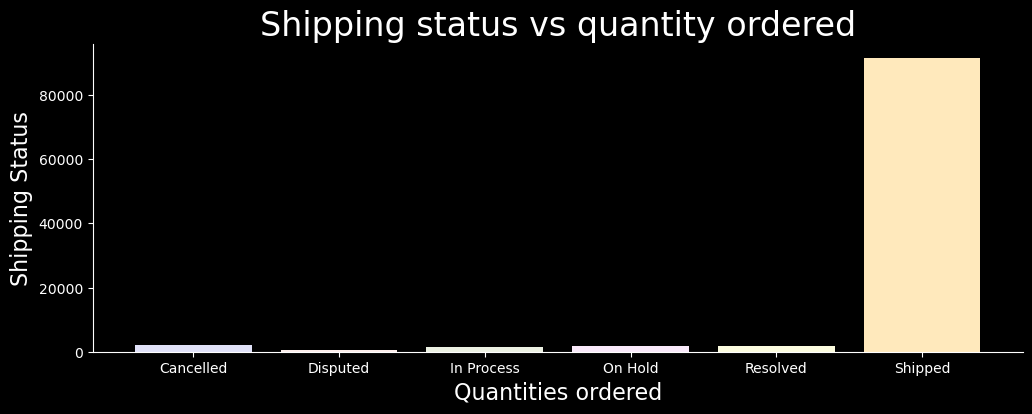

In [40]:
status_grouped = order.groupby(['status'], as_index= False)['quantityordered'].sum()
 # Setting the figure size
  # Visualizing using Bar Chart
with plt.style.context('dark_background'):
  # Plotting the BarChart
  fig, ax = plt.subplots(figsize=(12, 4))
  plt.bar(x=status_grouped.status, height='quantityordered', color=['#E0E1F8','#FCEEEB','#ECF1E3','#F9E9FA','#FCFCDF','#FFE9BC'], data=status_grouped)
  label_Style('Quantities ordered','Shipping Status')
  plot_Style()
  plt.title('Shipping status vs quantity ordered', fontdict={'fontsize':24})
  plt.grid(False)
plt.show()

<h3><font color = 'red'><b>13a. What is the Shipping Status across each Product Category? (apart from Shipped Status)

In [41]:
df_stat = order[order.status != "Shipped"].groupby(["status","productline"])["quantityordered"].sum()
df_stat1 = df_stat.unstack(level=0)
df_stat2 = df_stat.unstack(level=1)

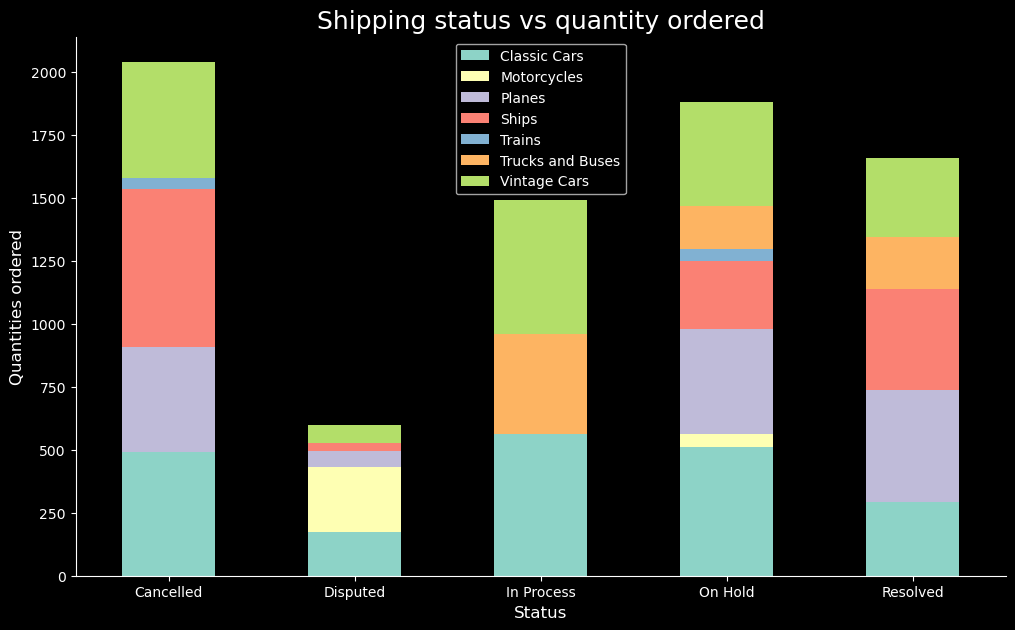

In [42]:
plt.rcParams["figure.figsize"] = (12, 7)
with plt.style.context('dark_background'):
  ax = df_stat2.plot.bar(stacked = True)
  ax.set_xlabel('Status', fontsize=12)
  ax.set_ylabel('Quantities ordered', fontsize=12)
  plot_Style()
  plt.title('Shipping status vs quantity ordered', fontdict={'fontsize':18})
  plt.legend(loc = 'upper center')
  plt.xticks(rotation = 0)
  plt.grid(False)
plt.show()

<style>
div.warn {    
    color: #356A89;
    background-color: #FDFBEF;
    border-left: 5px solid #3C82E3;
    padding: 0.5em;
    }
 </style>
<div class = warn>
<h3><b><font color = 'navy'>Spain, in EMEA, is the highest grossing country for Classic cars, Vintage cars, Trucks and Buses.


<h3><font color = 'red'><b>14. What are the Sales by Country across each productline?</h3>
<style>
div.warn {    
    background-color: #FDFBEF;
    }
 </style>
<div class = warn>
<h5><font color = 'green'> <b> *Hover over the bars to get the details

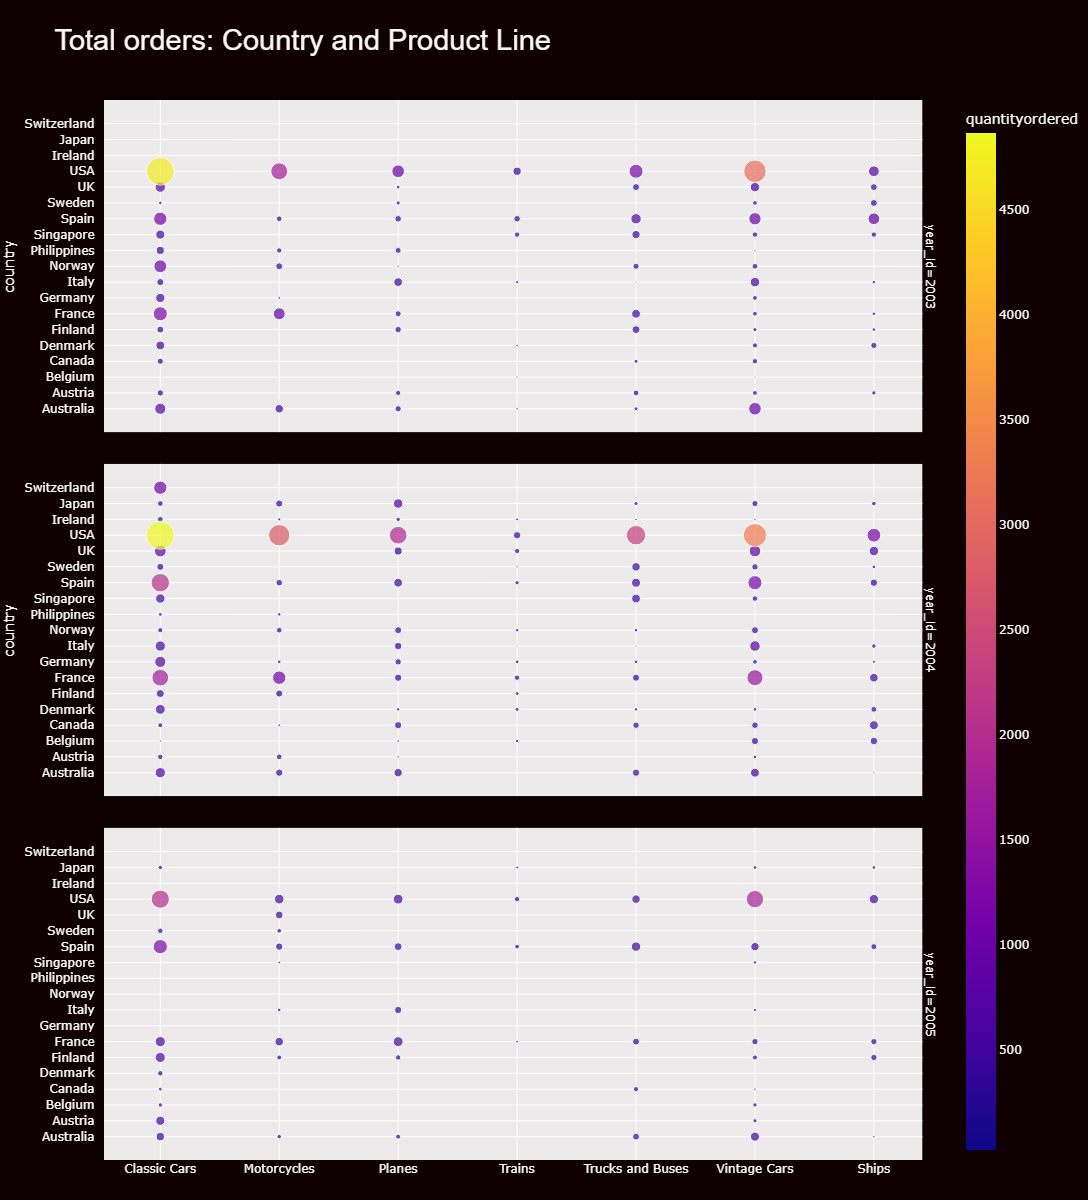

In [43]:
# data change 

df_ct_pt = order.groupby(['year_id','country','productline']).agg({"quantityordered" : "sum"}).reset_index()

# chart
fig = px.scatter(df_ct_pt, x='productline', color='quantityordered', y='country', size='quantityordered',
                 color_discrete_sequence=px.colors.sequential.Plasma_r,
                 facet_row='year_id',
                 title="Total orders: Country and Product Line")
# styling
fig.update_yaxes(ticksuffix='  ')
fig.update_layout(height=1200, xaxis_title='', yaxis_title='',
                  margin=dict(b=0),
                  plot_bgcolor='#ECEAEB', paper_bgcolor='#0E0003',
                  title_font=dict(size=29, color='#FCF8F9', family="Lato, sans-serif"),
                  font=dict(color='#FCF8F9'), 
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"))
fig.show()


<h3><font color = 'red'><b>15. How the Price and the MSRP varies by Productline?

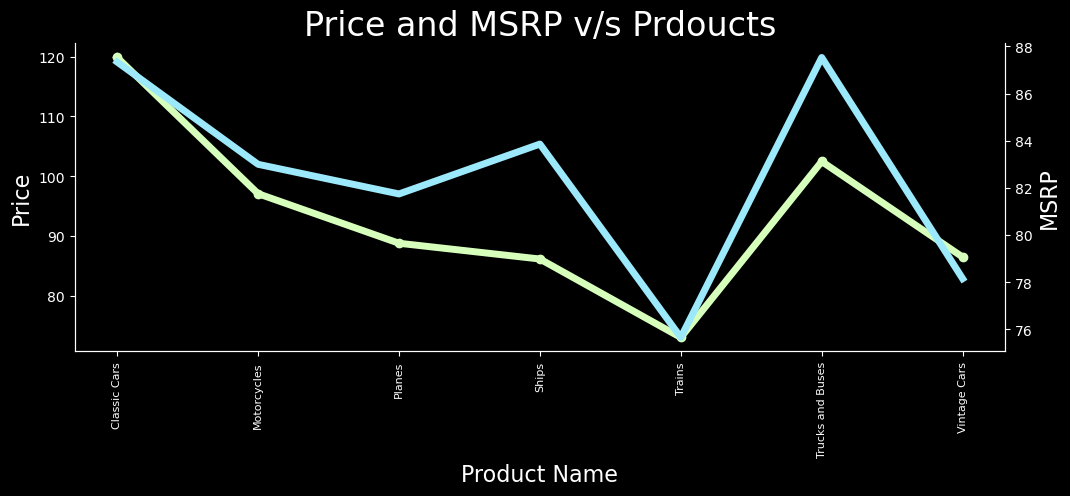

In [44]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.simplefilter('ignore')

msp = order.groupby(["productline"])["quantityordered"].sum()
mspp = order.groupby("productline")["priceeach"].mean()
prices = order.groupby('productline').mean()['priceeach']
msrp = order.groupby('productline').mean()['msrp']

prods = order.groupby('productline')
keys = [pair for pair, order in prods]
with plt.style.context('dark_background'):
  fig, ax1 = plt.subplots(figsize = (12,4))
  ax2 = ax1.twinx()
  ax1.plot(keys, msrp, color='#D7FFBC',linewidth = 5, marker = 'o')
  ax2.plot(keys, mspp, color='#9DE9FC',linewidth = 5)
  label_Style1('Product Name','Price')
  ax2.set_ylabel('MSRP', fontsize = 16)
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
  plot_Style1()
  plot_Style2()
  plt.title('Price and MSRP v/s Prdoucts', fontdict = {'fontsize':24})
fig.show()


<h3><b><font color = 'red'>16. How the Price of each item varied according to Quantity ordered across each Product line?

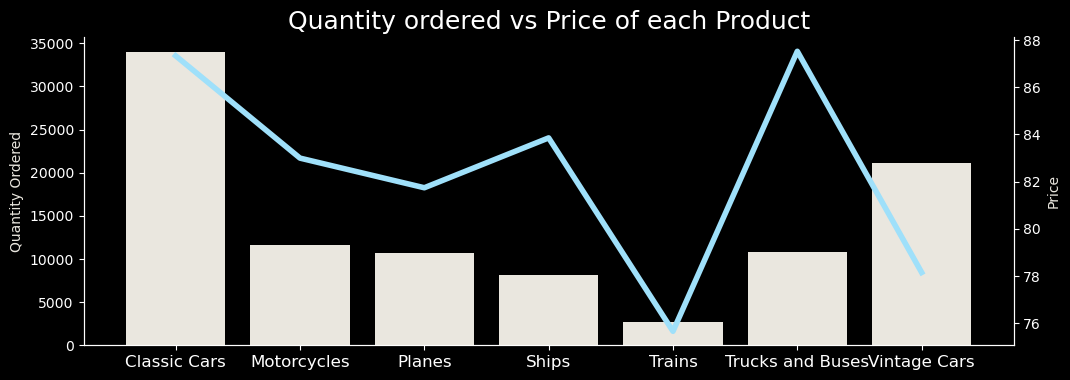

In [45]:
msp = order.groupby(["productline"])["quantityordered"].sum()
mspp = order.groupby("productline")["priceeach"].mean()
prices = order.groupby('productline').mean()['priceeach']
prods = order.groupby('productline')
keys = [pair for pair, order in prods]

with plt.style.context('dark_background'):
  fig, ax1 = plt.subplots(figsize = (12,4))
  ax2 = ax1.twinx()
  ax1.bar(keys, msp, color='#EAE7DF')
  ax2.plot(keys, mspp, color='#9FE0FA', linewidth = 4)
  ax1.set_xlabel('',color='#EAE7DF', size = 12)
  ax1.set_ylabel('Quantity Ordered', color='#EAE7DF')
  ax2.set_ylabel('Price', color='#EAE7DF')
  ax1.set_xticklabels(keys, rotation=0, size=12)
  plot_Style1()
  plot_Style2()
  plt.title('Quantity ordered vs Price of each Product', fontsize = 18)

fig.show()

<h3><font color = 'red'><b>17. How are the order attributes correlated with each other? 

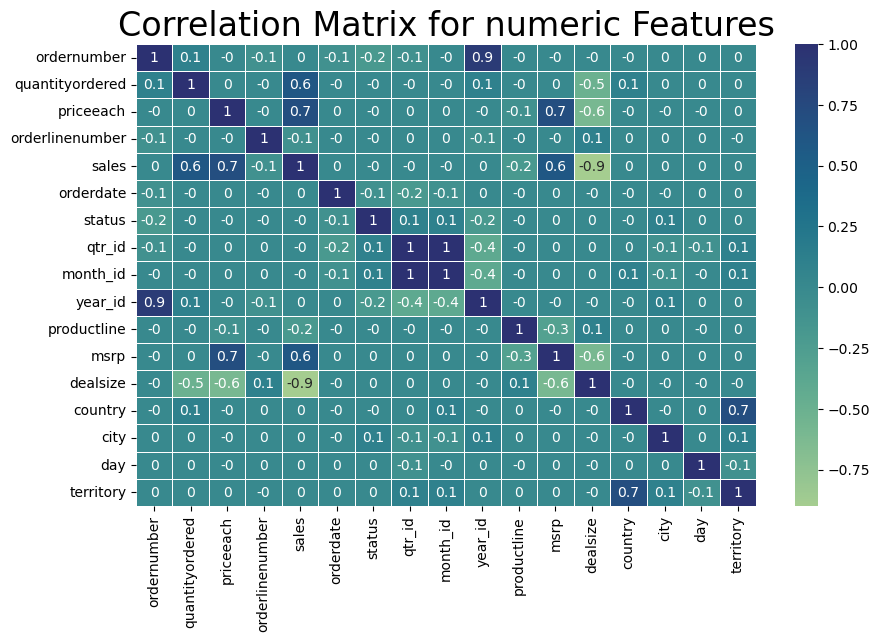

In [46]:
#changing to categorical variable and cat codes for numerical correlation
from turtle import color


df_numerized = round(order,1)
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name]= df_numerized[col_name].cat.codes

#plotting the heatmap
correlation_matrix = round((df_numerized.corr(method = 'pearson')),1)
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(correlation_matrix, annot = True, linewidth = 0.5, ax= ax, cmap = "crest")
plt.title('Correlation Matrix for numeric Features', fontsize =24)
plt.show()

<style>
div.warn {    
    color: #356A89;
    background-color: #FDFBEF;
    border-left: 5px solid #3C82E3;
    padding: 0.5em;
    }
 </style>
<div class = warn>We want to see the attributes with high correlation from the matrix

In [47]:
corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()

sorted_pairs = corr_pairs.sort_values()

<h3><font color = 'green'> <b>+ve High correlation

In [48]:
high_corr = sorted_pairs[((sorted_pairs)>0.5) & ((sorted_pairs)<1)]
high_corr = high_corr.drop_duplicates()
high_corr

sales        quantityordered    0.551426
msrp         sales              0.635239
priceeach    sales              0.657830
territory    country            0.663719
msrp         priceeach          0.670620
ordernumber  year_id            0.904596
qtr_id       month_id           0.979300
dtype: float64

<style>
div.warn {    
    color: #356A89;
    background-color: #FDFBEF;
    border-left: 5px solid #3C82E3;
    padding: 0.5em;
    }
 </style>
<div class = warn><h3><b><font color = 'navy'> From the above table, we observe that Sales has 55% positive correlation with Quantities ordered.
Also, Sales is positively affected by the Price of each item and the MSRP of the item at 63.5% and 65.7% respectively. 

<h3><font color = 'red'><b> -ve High correlation

In [49]:
low_corr = sorted_pairs[((sorted_pairs)<-0.49) & ((sorted_pairs)>-1)]
low_corr = low_corr.drop_duplicates()
low_corr

sales      dealsize   -0.862814
priceeach  dealsize   -0.630408
msrp       dealsize   -0.580248
dtype: float64

<style>
div.warn {    
    color: #356A89;
    background-color: #FDFBEF;
    border-left: 5px solid #3C82E3;
    padding: 0.5em;
    }
 </style>
<div class = warn><h3><b><font color = 'navy'> Further we discern that the Sales is 86% negatively affected with the Deal size.
Moreover, the reduction in Dealsize is related to increase in price of each item (by 63%) and increase in the MSRP (by 58%).

<h3><font color = 'red'><b>18. How does the regression between Sales and Price of each item look like?

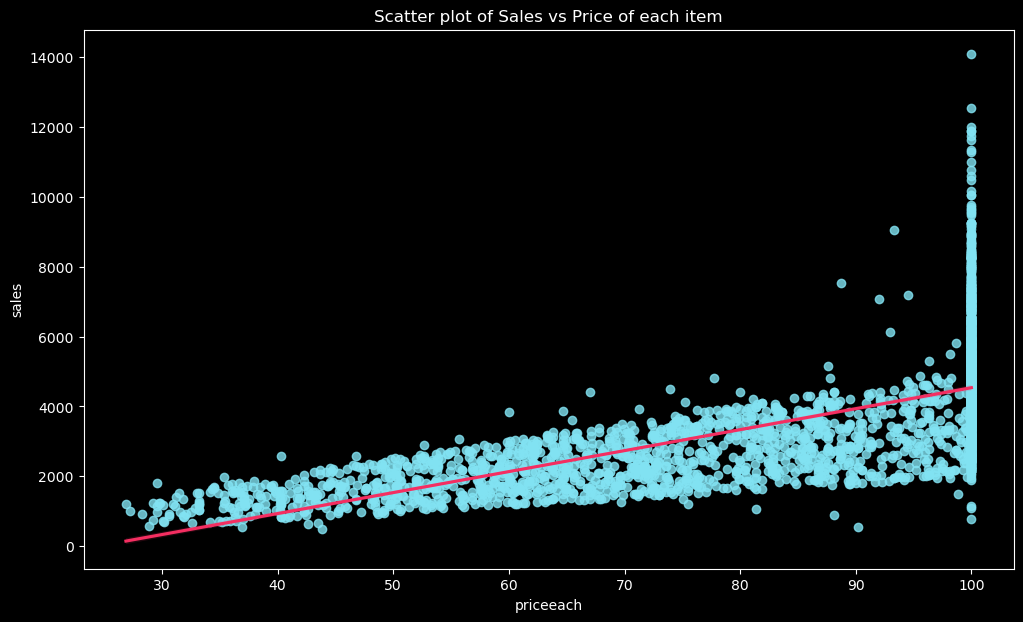

In [50]:
with plt.style.context('dark_background'):
  ax = sns.regplot(x= order.priceeach,y=order.sales,data=order, scatter_kws= {"color": "#82E3F3"}, line_kws={"color":"#F42E61"} )
  
  ax.set_title('Scatter plot of Sales vs Price of each item')


<h3><font color = 'red'><b>19. How are MSRP and Price of each item related to each other? 

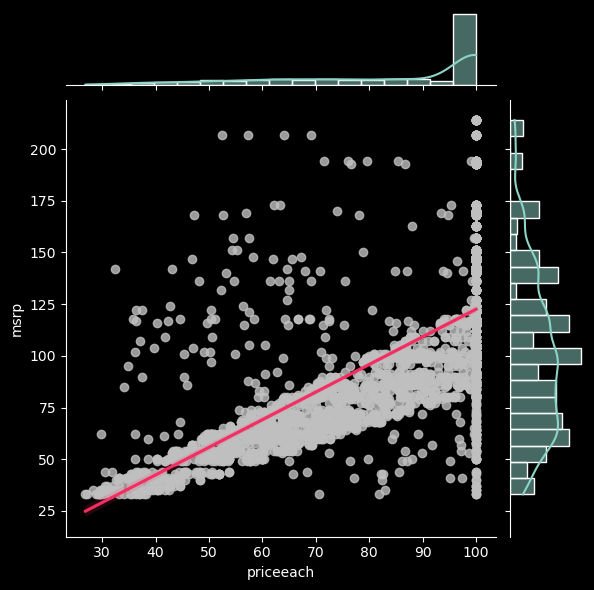

In [51]:

with plt.style.context('dark_background'):
   sns.jointplot(data = order, x = order.priceeach, y = order.msrp,
             kind = "reg",scatter_kws= {"color": "silver"}, line_kws={"color":"#F42E61"});
plt.show()

<style>
div.warn {    
    color: #356A89;
    background-color: #FDFBEF;
    border-left: 5px solid #3C82E3;
    padding: 0.5em;
    }
 </style>
<div class = warn>
<h2><font color = 'navy'><b>Customer Segmentation and Targeting

In [52]:
#the recent date

order['date'] = pd.to_datetime(order.orderdate)


In [53]:
order.date.max()

Timestamp('2005-05-31 00:00:00')

In [54]:
order.date.min()

Timestamp('2003-01-06 00:00:00')

In [55]:
#creating a RFM table
import datetime as dt
NOW = dt.datetime(2005, 5, 31)
order['customername'] = customer['customername']
order['total_price'] = order['quantityordered']*order['priceeach']
rfmTable = order.groupby('customername').agg({'date': lambda x: (NOW - x.max()).days, 'ordernumber': lambda x: len(x), 'total_price': lambda x: x.sum()})
rfmTable['date'] = rfmTable['date'].astype(int)
rfmTable.rename(columns={'date': 'Recency', 
                         'ordernumber': 'Frequency', 
                         'total_price': 'Monetary'}, inplace=True)

In [56]:
rfmTable.head(10)

,Recency,Frequency,Monetary
customername,,,
"AV Stores, Co.",195,51,136873.25
Alpha Cognac,64,20,58885.28
Amica Models & Co.,264,26,72645.01
"Anna's Decorations, Ltd",83,46,121260.41
Atelier graphique,187,7,21213.16
"Australian Collectables, Ltd",22,23,56139.62
"Australian Collectors, Co.",183,55,164575.87
"Australian Gift Network, Co",118,15,46399.18
Auto Assoc. & Cie.,232,18,53364.97


<style>
div.warn {    
    color: #356A89;
    background-color: #FDFBEF;
    border-left: 5px solid #3C82E3;
    padding: 0.5em;
    }
 </style>
<div class = warn><h4><font color = 'indigo'><b>We now split the metrics into segments by using quartiles
the highest recency, highest frequency and monetary values are our best customers

In [57]:
df_RFM = rfmTable
quintiles = df_RFM[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()


In [58]:
#function to calculate recency score
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1
# function to calculate frequency and monetory score
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5 
    

In [59]:
df_RFM['R'] = df_RFM['Recency'].apply(lambda x: r_score(x))
df_RFM['F'] = df_RFM['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
df_RFM['M'] = df_RFM['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [60]:
df_RFM['RFM Score'] = round((df_RFM['R'] + df_RFM['F'] + df_RFM['M'])/3, 2)

In [61]:
segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

In [62]:
df_RFM['Segment'] = df_RFM['R'].map(str) + df_RFM['F'].map(str)
df_RFM['Segment'] = df_RFM['Segment'].replace(segt_map, regex=True)
df_RFM.head()

,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
customername,,,,,,,,
"AV Stores, Co.",195,51,136873.25,3,5,5,4.33,loyal customers
Alpha Cognac,64,20,58885.28,4,2,2,2.67,potential loyalists
Amica Models & Co.,264,26,72645.01,1,3,3,2.33,at risk
"Anna's Decorations, Ltd",83,46,121260.41,4,5,5,4.67,loyal customers
Atelier graphique,187,7,21213.16,3,1,1,1.67,about to sleep


<h3><font color = "red">Plotting the R,F,M graphs

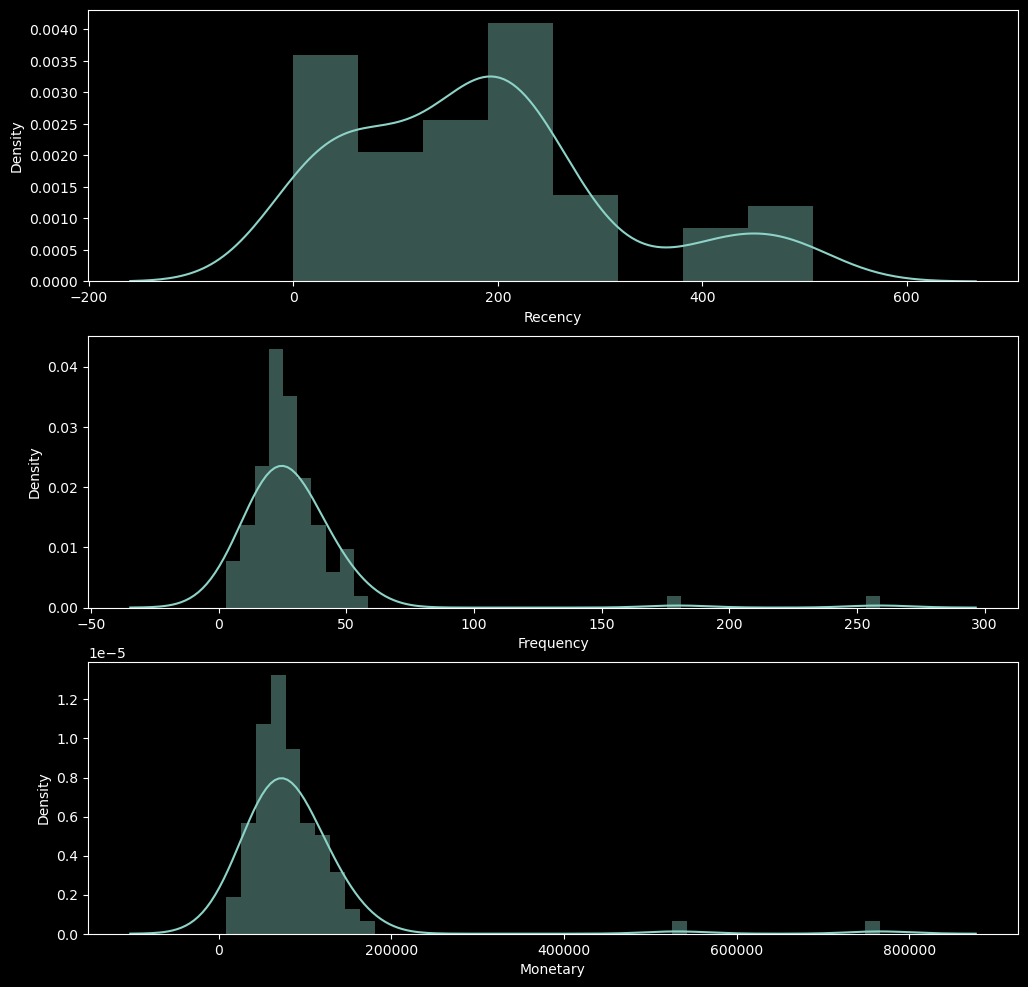

In [63]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Plot RFM distributions
with plt.style.context('dark_background'):
  fig, ax = plt.subplots(figsize=(12,12))
  # Plot distribution of R
  plt.subplot(3, 1, 1); sns.distplot(df_RFM['Recency'])
  # Plot distribution of F
  plt.subplot(3, 1, 2); sns.distplot(df_RFM['Frequency'])
  # Plot distribution of M
  plt.subplot(3, 1, 3); sns.distplot(df_RFM['Monetary'])
# Show the plot
plt.show()

<style>
div.warn {    
    color: #356A89;
    background-color: #FDFBEF;
    border-left: 5px solid #3C82E3;
    padding: 0.5em;
    }
 </style>
<div class = warn>
<table>
    <tr>
        <th><font color = 'red'><font size = '3px'>Segment</th>
        <th><font color = 'navy'><font size = '4px'>Description</th></font>
    </tr>
    <tr>
    <td><b><font color = 'navy'>Champions</td>
    <td>Bought recently, buy often and spend the most</td>
    </tr>
    <tr>
    <td><font color = 'orange'>Loyal Customers</td>
    <td>Buy on a regular basis. Responsive to promotions.</td>
    </tr>
    <tr>
    <td><b><font color = 'green'>Potential Loyalist</td>
    <td>Recent customers with average frequency</td>
    </tr>
    <tr>
    <td><b><font color = 'black'>Recent Customers</td>
    <td>Bought most recently, but not often.</td>
    </tr>
     <tr>
    <td><B><font color = 'purple'>Promising</td>
    <td>Recent shoppers, but haven’t spent much.</td>
    </tr>
     <tr>
    <td><font color = 'slategrey'><b>Customers Needing Attention</td>
    <td>Above average recency, frequency and monetary values. May not have bought very recently though.</td>
    </tr>
     <tr>
    <td><font color = 'magenta'><b>About To Sleep</td>
    <td>Below average recency and frequency. Will lose them if not reactivated.</td>
    </tr>
     <tr>
    <td><font color = 'navy'><b>At Risk</td>
    <td>Purchased often but a long time ago. Need to bring them back!</td>
    </tr>
    <tr>
    <td><font color = 'navy'><b>Can’t Lose Them</td>
    <td>Used to purchase frequently but haven’t returned for a long time.</td>
    </tr>
    <tr>
    <td><b><font color = 'red'>Hibernating</td>
    <td>Last purchase was long back and low number of orders. May be lost.</td>
    </tr>
</table>
</div>

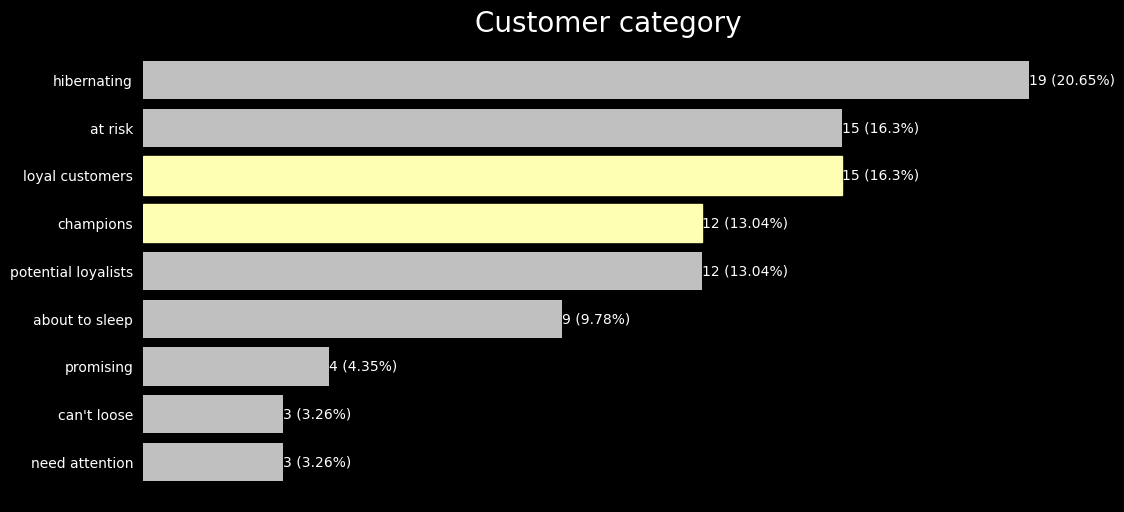

In [64]:
#Segmentation Targeting Plotting
# count the number of customers in each segment
def customerSegmentPlot(df_RFM, title):
    segments_counts = df_RFM.value_counts().sort_values(ascending=True)
    with plt.style.context('dark_background'):
      fig, ax = plt.subplots(figsize = (12,6))

      bars = ax.barh(range(len(segments_counts)),
                    segments_counts,
                    color='silver')
      ax.set_frame_on(False)
      ax.tick_params(left=False,
                    bottom=False,
                    labelbottom=False)
      ax.set_yticks(range(len(segments_counts)))
      ax.set_yticklabels(segments_counts.index)
      ax.set_title(title,fontsize=20)
      for i, bar in enumerate(bars):
              value = bar.get_width()
              if segments_counts.index[i] in ['champions', 'loyal customers']:
                  bar.set_color('C1')
              ax.text(value,
                      bar.get_y() + bar.get_height()/2,
                      '{:,} ({:}%)'.format(int(value),
                                        round(value*100/92,2)), #92 becuase 92 unique customers
                      va='center',
                      ha='left'
                   )

    plt.show()
    
customerSegmentPlot(df_RFM['Segment'], title ="Customer category")



<style>
div.warn {    
    color: #356A89;
    background-color: #FDFBEF;
    border-left: 5px solid #3C82E3;
    padding: 0.5em;
    }
 </style>
<div class = warn>
<h2><font color = 'navy'><b>Top 5 and Bottom 5 Countries by Productline

In [65]:
dfc = pd.DataFrame(order.groupby(["productline","country"]).quantityordered.sum().unstack(level=0).fillna(0))
for col in dfc.columns:
  top_countries = []
  for y in range(5):
    top_countries.append(dfc[dfc[col] != 0].sort_values(by = col, ascending = False).head(5).index[y])
  print(f'Top 5 countries for {col:<20s} {top_countries}',end = "\n")

print("======================================================================================================")

for col in dfc.columns:
  bottom_countries = []
  for y in range(5):
    bottom_countries.append(dfc[dfc[col] != 0].sort_values(by = col, ascending = True).head(10).index[y])
  print(f'Bottom 5 countries for {col:<20s} {bottom_countries}',end = "\n")


Top 5 countries for Classic Cars         ['USA', 'Spain', 'France', 'Australia', 'UK']
Top 5 countries for Motorcycles          ['USA', 'France', 'Australia', 'Spain', 'Norway']
Top 5 countries for Planes               ['USA', 'France', 'Italy', 'Spain', 'Australia']
Top 5 countries for Ships                ['USA', 'Spain', 'UK', 'France', 'Canada']
Top 5 countries for Trains               ['USA', 'Spain', 'France', 'Singapore', 'UK']
Top 5 countries for Trucks and Buses     ['USA', 'Spain', 'France', 'Singapore', 'Australia']
Top 5 countries for Vintage Cars         ['USA', 'Spain', 'France', 'Australia', 'UK']
Bottom 5 countries for Classic Cars         ['Belgium', 'Ireland', 'Japan', 'Canada', 'Philippines']
Bottom 5 countries for Motorcycles          ['Canada', 'Singapore', 'Ireland', 'Italy', 'Germany']
Bottom 5 countries for Planes               ['Belgium', 'Denmark', 'Sweden', 'Ireland', 'Austria']
Bottom 5 countries for Ships                ['Germany', 'Australia', 'Austria', '

<style>
div.warn {    
    color: #356A89;
    background-color: #FDFBEF;
    border-left: 5px solid #3C82E3;
    padding: 0.5em;
    }
 </style>
<div class = warn>
<h2><font color = 'navy'><b>Top 5 and Bottom 5 Customers by Productline

In [66]:
dfp = pd.DataFrame(order.groupby(["productline","customername"]).quantityordered.sum().unstack(level=0).fillna(0))

for col in dfp.columns:
  top_cust = []
  for y in range(5):
    top_cust.append(dfp[dfp[col] != 0].sort_values(by = col, ascending = False).head(5).index[y])
  print(f'Top 5 Customers for {col:<18s} {top_cust}',end = "\n")

print("===================================================================================================================================================")

for col in dfp.columns:
  bot_cust = []
  for y in range(5):
    bot_cust.append(dfp[dfp[col] != 0].sort_values(by = col, ascending = True).head(5).index[y])
  print(f'Bottom 5 Customers for {col:<18s} {bot_cust}',end = "\n")


Top 5 Customers for Classic Cars       ['Euro Shopping Channel', 'Mini Gifts Distributors Ltd.', 'Muscle Machine Inc', 'Vida Sport, Ltd', 'Toms Spezialitten, Ltd']
Top 5 Customers for Motorcycles        ['Euro Shopping Channel', 'Auto Canal Petit', 'Daedalus Designs Imports', 'Land of Toys Inc.', 'Australian Collectors, Co.']
Top 5 Customers for Planes             ['Euro Shopping Channel', 'Rovelli Gifts', 'La Rochelle Gifts', 'The Sharp Gifts Warehouse', 'Australian Collectors, Co.']
Top 5 Customers for Ships              ['Euro Shopping Channel', 'Danish Wholesale Imports', 'Gifts4AllAges.com', 'Mini Gifts Distributors Ltd.', 'Enaco Distributors']
Top 5 Customers for Trains             ['Euro Shopping Channel', 'Mini Gifts Distributors Ltd.', 'Dragon Souveniers, Ltd.', 'AV Stores, Co.', 'Land of Toys Inc.']
Top 5 Customers for Trucks and Buses   ['Mini Gifts Distributors Ltd.', 'Euro Shopping Channel', 'Handji Gifts& Co', 'Dragon Souveniers, Ltd.', 'Corrida Auto Replicas, Ltd']
Top 5

<img src="https://i.gifer.com/D92T.gif" alt="Lamp" width="600" height="400">